*For this data project I'm analyzing some 911 call data from Kaggle.*

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

110

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [10]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [11]:
df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

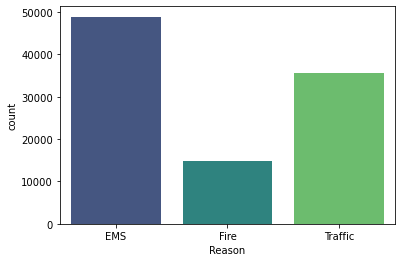

In [12]:
sns.countplot(x= 'Reason', data = df, palette='viridis')

In [13]:
type(df['timeStamp'].iloc[0])

str

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
time = df['timeStamp'].iloc[0]

In [17]:
time

Timestamp('2015-12-10 17:40:00')

In [18]:
time.day

10

In [19]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day'] = df['timeStamp'].apply(lambda x: x.day)
df['Day of the week'] = df['timeStamp'].apply(lambda x: x.day_of_week)


In [20]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Day of the week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,10,3


In [21]:
dmap = {2: 'wed', 3:'thurs', 4:'fri', 5 : 'sat', 6: 'sun', 0 :'mon',1:'tue'}

In [22]:
df['Day of the week'] = df['Day of the week'].map(dmap)

In [23]:
df['Day of the week']

0        thurs
1        thurs
2        thurs
3        thurs
4        thurs
         ...  
99487      wed
99488      wed
99489      wed
99490      wed
99491      wed
Name: Day of the week, Length: 99492, dtype: object

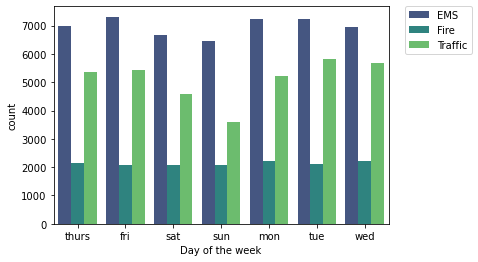

In [24]:
sns.countplot(x='Day of the week',data =df,  hue ='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

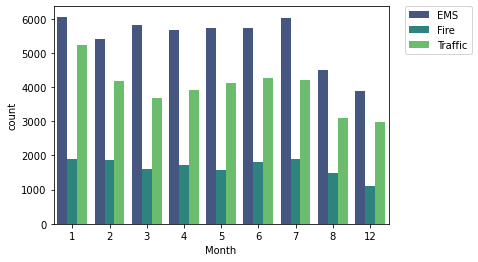

In [25]:
sns.countplot(x='Month',data =df,  hue ='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [26]:
byMonth = df.groupby('Month').count()

In [27]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Day of the week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

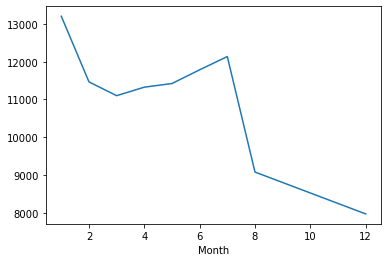

In [28]:
byMonth['lat'].plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


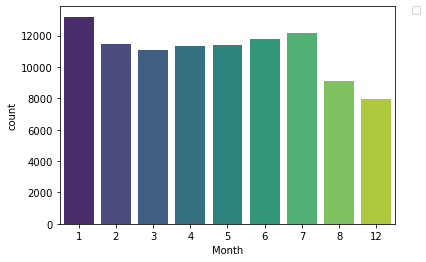

In [29]:
sns.countplot(x='Month',data =df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

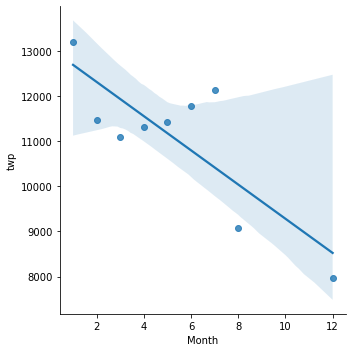

In [30]:
sns.lmplot(x='Month', y = 'twp', data = byMonth.reset_index())

In [31]:
t = df['timeStamp'].iloc[0]

In [32]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [33]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Day of the week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,thurs,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,thurs,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,10,thurs,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,10,thurs,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,10,thurs,2015-12-10


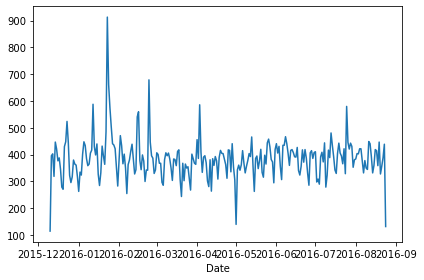

In [34]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

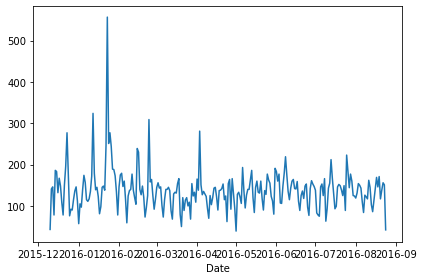

In [36]:
df[ df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

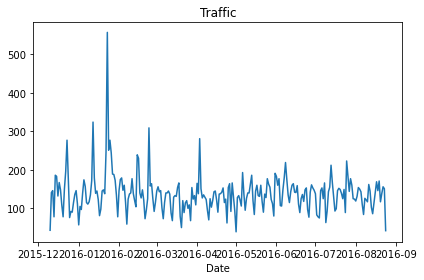

In [37]:
df[ df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

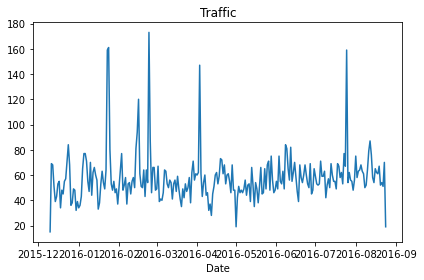

In [38]:
df[ df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

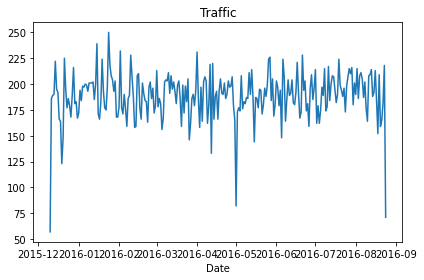

In [39]:
df[ df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

In [45]:
dayHour = df.groupby( by=['Day of the week', 'Hour']).count()['Reason'].unstack()

<Figure size 864x432 with 0 Axes>

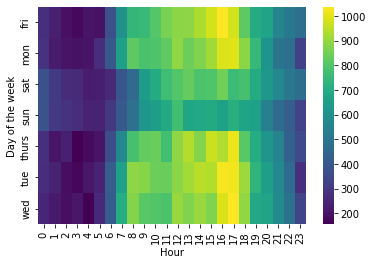

<Figure size 864x432 with 0 Axes>

In [53]:
sns.heatmap(dayHour,cmap = 'viridis')
plt.figure(figsize = (12,6))

In [50]:
dayMonth = df.groupby( by=['Day of the week', 'Month']).count()['Reason'].unstack()

<Figure size 864x288 with 0 Axes>

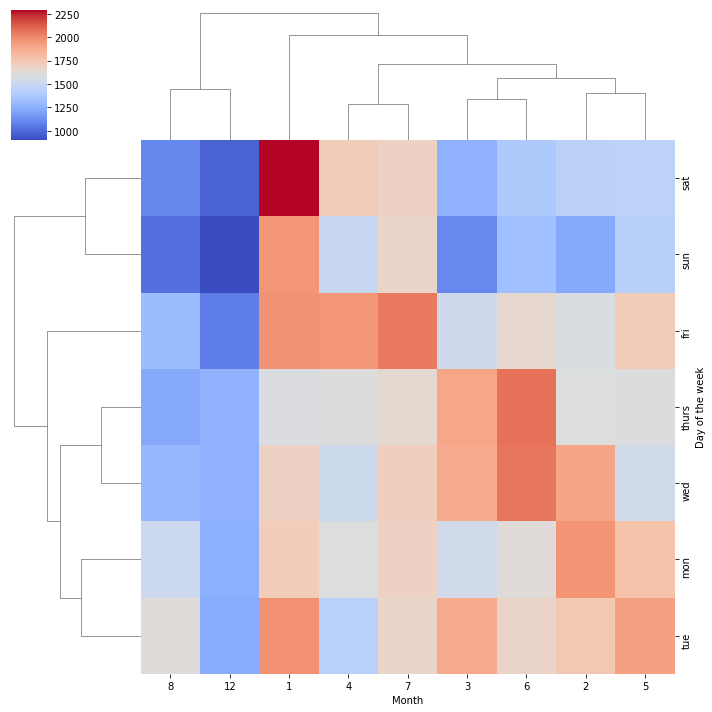

<Figure size 864x288 with 0 Axes>

In [54]:
sns.clustermap(dayMonth,cmap = 'coolwarm')
plt.figure(figsize = (12,4))